# Распознавание рукописных цифр из набора данных MNIST

Пример из курса ["Программирование глубоких нейронных сетей на Python"](https://www.asozykin.ru/courses/nnpython).

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [0]:
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import utils
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import toimage
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных с рукописными цифрами**

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**Преобразование размерности данных в наборе**

In [0]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

**Нормализация данных**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

**Работа с правильными ответами**

In [0]:
n = 100
print(y_train[n])

5


**Преобразуем метки в формат one hot encoding**

In [0]:
Y_train = utils.to_categorical(y_train, 10)
Y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [0]:
print(Y_train[n])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [0]:
model = Sequential()

**Добавляем уровни сети**

In [0]:
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [0]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 800)               628000    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [0]:
history = model.fit(X_train, Y_train, batch_size=200, epochs=25, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/25
 - 2s - loss: 0.3116 - acc: 0.9124 - val_loss: 0.1563 - val_acc: 0.9571
Epoch 2/25
 - 1s - loss: 0.1272 - acc: 0.9633 - val_loss: 0.1158 - val_acc: 0.9646
Epoch 3/25
 - 1s - loss: 0.0831 - acc: 0.9756 - val_loss: 0.0924 - val_acc: 0.9719
Epoch 4/25
 - 1s - loss: 0.0587 - acc: 0.9832 - val_loss: 0.0869 - val_acc: 0.9728
Epoch 5/25
 - 2s - loss: 0.0420 - acc: 0.9884 - val_loss: 0.0826 - val_acc: 0.9737
Epoch 6/25
 - 1s - loss: 0.0308 - acc: 0.9920 - val_loss: 0.0770 - val_acc: 0.9753
Epoch 7/25
 - 1s - loss: 0.0229 - acc: 0.9943 - val_loss: 0.0775 - val_acc: 0.9768
Epoch 8/25
 - 1s - loss: 0.0173 - acc: 0.9963 - val_loss: 0.0714 - val_acc: 0.9795
Epoch 9/25
 - 1s - loss: 0.0128 - acc: 0.9974 - val_loss: 0.0739 - val_acc: 0.9792
Epoch 10/25
 - 1s - loss: 0.0094 - acc: 0.9983 - val_loss: 0.0729 - val_acc: 0.9797
Epoch 11/25
 - 2s - loss: 0.0070 - acc: 0.9991 - val_loss: 0.0722 - val_acc: 0.9805
Epoch 12/25
 - 1s - loss: 0.0059 - 

## Оцениваем качество работы сети

**Качество работы сети на тестовых данных**

In [0]:
scores = model.evaluate(X_test, Y_test, verbose=0)
print("Точность работы на тестовых данных: %.2f%%" % (scores[1]*100))

Точность работы на тестовых данных: 98.26%


**Графики качества во время обучения**

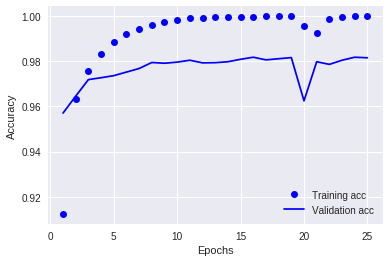

In [0]:
plt.plot(history.history['acc'], label='Аккуратность на обучающем наборе')
plt.plot(history.history['val_acc'], label='Аккуратность на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Аккуратность')
plt.legend()
plt.show()

## Используем сеть для распознавания рукописных цифр

In [0]:
n_rec = 488

**Меняем размерность изображения и нормализуем его**

In [0]:
x = X_test[n_rec]
x = np.expand_dims(x, axis=0)


**Запускаем распознавание**

In [0]:
prediction = model.predict(x)


**Печатаем результаты распознавания**

In [0]:
print(prediction)

[[5.5798539e-11 2.6377051e-13 1.3442480e-10 2.7512586e-08 3.6324874e-07
  5.3957484e-13 1.6500968e-15 2.1458113e-04 3.7423074e-08 9.9978501e-01]]


**Преобразуем результаты из формата one hot encoding**

In [0]:
prediction = np.argmax(prediction)
print(prediction)

9


**Печатаем правильный ответ**

In [0]:
print(y_test[n_rec])

9
